In [726]:
import pandas as pd
import matplotlib.pyplot as plt
from math import floor, ceil

In [727]:
dane = pd.read_csv('dane_dif.csv', sep = ';', decimal = ',',
                   index_col=0)

In [728]:
dane['Sprzedaz calkowita'] = dane['prodA'] + dane['prodB']

In [729]:
kolejnoscMiesiecy = {'styczen': 1, 'luty': 2, 'marzec': 3}
dane['Miesiac'] = pd.Categorical(dane['Miesiac'], categories=kolejnoscMiesiecy.keys(), ordered=True)
dane_posortowane = dane.sort_values(by=['Miesiac', 'dzien'])
dane_posortowane.reset_index(drop=True, inplace=True)

In [730]:
sprzedaz = dane_posortowane[['dzien', 'Miesiac', 'Sprzedaz calkowita']].copy()
sprzedaz.describe

<bound method NDFrame.describe of     dzien  Miesiac  Sprzedaz calkowita
0       1  styczen                 3.5
1       2  styczen                 1.9
2       3  styczen                 0.7
3       4  styczen                 1.9
4       5  styczen                 2.6
..    ...      ...                 ...
85     27   marzec                 9.8
86     28   marzec                17.7
87     29   marzec                 9.8
88     30   marzec                17.8
89     31   marzec                 4.2

[90 rows x 3 columns]>

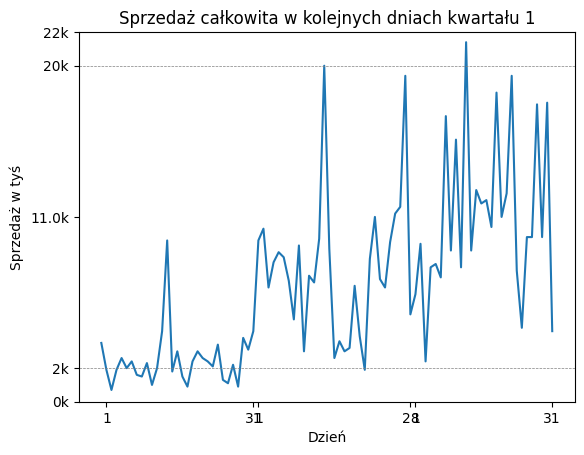

In [731]:
min_value = (sprzedaz['Sprzedaz calkowita'].min())
min_value = floor(min_value)

max_value = (sprzedaz['Sprzedaz calkowita'].max())
max_value = ceil(max_value) 

half_value = min_value + (max_value - min_value)/2

plt.plot(sprzedaz.index, sprzedaz['Sprzedaz calkowita'])
plt.title('Sprzedaż całkowita w kolejnych dniach kwartału 1')
plt.xlabel('Dzień')
plt.ylabel('Sprzedaż w tyś')
plt.ylim(min_value, max_value) # usuwa marginesy

yticksy = (min_value, min_value + 2, half_value, max_value - 2, max_value)
yticksy_labels = (f'{min_value}k', f'{min_value + 2}k', f'{half_value}k', f'{max_value - 2}k', f'{max_value}k')

xticks_positions = [1, 30, 31, 61, 62, 89]
xticks_labels = ['1', '31', '1', '28', '1', '31']

plt.xticks(xticks_positions, xticks_labels)

grid_y_values = [2, max_value - 2]

for value in grid_y_values:
    plt.axhline(y=value, linestyle='--', linewidth=0.5, color='gray')

plt.yticks(yticksy, yticksy_labels)
plt.show()

In [732]:
sprzedaz = sprzedaz[sprzedaz['Miesiac'] != 'luty']

kolejnoscMiesiecy2 = {'styczen': 1, 'marzec': 2} 

sprzedaz['Miesiac'] = pd.Categorical(sprzedaz['Miesiac'], categories=kolejnoscMiesiecy2.keys(), ordered=True)

C:\Users\cwiek\AppData\Local\Temp\ipykernel_20272\4199628395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sprzedaz['Miesiac'] = pd.Categorical(sprzedaz['Miesiac'], categories=kolejnoscMiesiecy2.keys(), ordered=True)


In [733]:
sprzedaz_cal = sprzedaz.groupby(['Miesiac'])['Sprzedaz calkowita'].sum()
sprzedaz_cal.describe

C:\Users\cwiek\AppData\Local\Temp\ipykernel_20272\2942558314.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sprzedaz_cal = sprzedaz.groupby(['Miesiac'])['Sprzedaz calkowita'].sum()


<bound method NDFrame.describe of Miesiac
styczen     76.9
marzec     347.3
Name: Sprzedaz calkowita, dtype: float64>

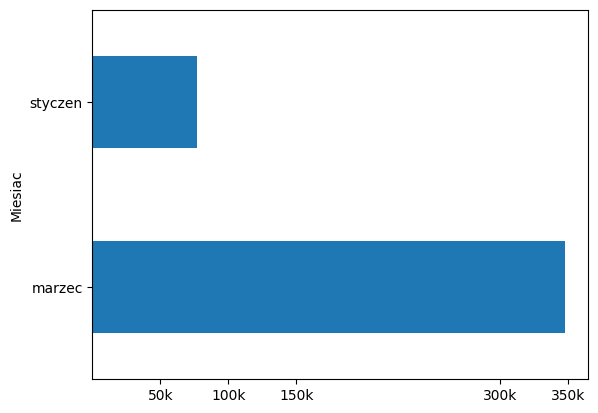

In [734]:
sprzedaz_cal.plot.barh()
xticks_positions = [50, 100, 150, 300, 350]  # Your desired tick positions
xticks_labels = ['50k', '100k', '150k', '300k', '350k']  # Your desired tick labels
plt.xticks(xticks_positions, xticks_labels)
plt.gca().invert_yaxis()
plt.show()

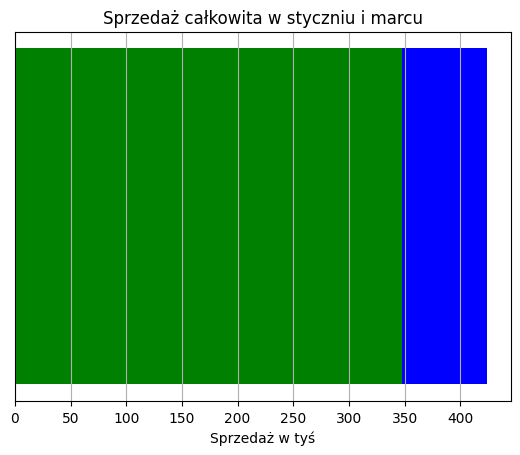

In [735]:
sprzedaz_marzec = sprzedaz[sprzedaz['Miesiac'] == 'marzec']['Sprzedaz calkowita'].sum()
sprzedaz_styczen = sprzedaz[sprzedaz['Miesiac'] == 'styczen']['Sprzedaz calkowita'].sum() + sprzedaz_marzec

plt.barh('styczen i marzec', [sprzedaz_styczen, sprzedaz_marzec], color=['blue', 'green'])
plt.title('Sprzedaż całkowita w styczniu i marcu')
plt.xlabel('Sprzedaż w tyś')
plt.ylabel('Total Sales')
plt.grid('x')
plt.gca().yaxis.set_visible(False)
plt.show()

In [736]:
sprzedaz = dane_posortowane[['dzien', 'Miesiac', 'prodA']].copy()
sprzedaz_wieksza_od_sredniej = sprzedaz[sprzedaz['prodA'] > sprzedaz['prodA'].mean()]
sprzedaz_wieksza_od_sredniej.describe

<bound method NDFrame.describe of     dzien  Miesiac  prodA
13     14  styczen    9.3
31      1     luty    8.2
32      2     luty    9.9
33      3     luty    6.1
34      4     luty    6.4
35      5     luty    8.2
36      6     luty    8.0
39      9     luty    8.4
41     11     luty    7.4
42     12     luty    5.9
43     13     luty    7.8
44     14     luty   19.0
45     15     luty    7.4
53     23     luty    6.6
54     24     luty    9.0
55     25     luty    6.3
56     26     luty    6.5
57     27     luty    8.2
58     28     luty    9.3
59      1   marzec    7.6
60      2   marzec   16.0
65      7   marzec    7.6
66      8   marzec    6.8
67      9   marzec    6.0
68     10   marzec   13.2
69     11   marzec    8.8
70     12   marzec   15.2
72     14   marzec   19.8
73     15   marzec    6.8
74     16   marzec   12.4
75     17   marzec    9.2
76     18   marzec    9.8
77     19   marzec    7.8
78     20   marzec   18.0
79     21   marzec    9.0
80     22   marzec   12.0
81  

In [737]:
sortowane = sprzedaz_wieksza_od_sredniej.sort_values(['Miesiac', 'prodA'])
sortowane.describe

<bound method NDFrame.describe of     dzien  Miesiac  prodA
13     14  styczen    9.3
42     12     luty    5.9
33      3     luty    6.1
55     25     luty    6.3
34      4     luty    6.4
56     26     luty    6.5
53     23     luty    6.6
41     11     luty    7.4
45     15     luty    7.4
43     13     luty    7.8
36      6     luty    8.0
31      1     luty    8.2
35      5     luty    8.2
57     27     luty    8.2
39      9     luty    8.4
54     24     luty    9.0
58     28     luty    9.3
32      2     luty    9.9
44     14     luty   19.0
67      9   marzec    6.0
66      8   marzec    6.8
73     15   marzec    6.8
82     24   marzec    7.0
84     26   marzec    7.0
85     27   marzec    7.2
59      1   marzec    7.6
65      7   marzec    7.6
77     19   marzec    7.8
87     29   marzec    8.2
69     11   marzec    8.8
79     21   marzec    9.0
75     17   marzec    9.2
76     18   marzec    9.8
80     22   marzec   12.0
74     16   marzec   12.4
68     10   marzec   13.2
88  

In [738]:
grupowane = sortowane.groupby(['Miesiac'])['dzien'].count()

C:\Users\cwiek\AppData\Local\Temp\ipykernel_20272\2820116299.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupowane = sortowane.groupby(['Miesiac'])['dzien'].count()


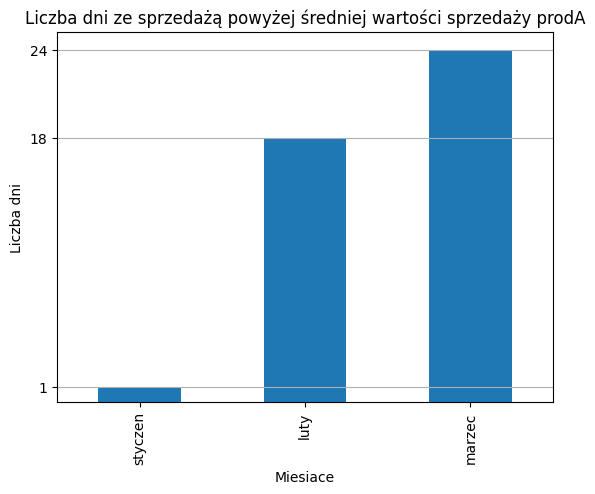

In [739]:
grupowane.plot.bar()
yticksy = (1, 18, 24)
plt.yticks(yticksy)
plt.title('Liczba dni ze sprzedażą powyżej średniej wartości sprzedaży prodA')
plt.xlabel('Miesiace')
plt.ylabel('Liczba dni')
plt.grid(True, axis = 'y')
plt.show()

In [740]:
sprzedaz_marzec = dane[dane['Miesiac'] == 'marzec']
sprzedaz_marzec = sprzedaz_marzec.sort_values(by='prodA', ascending=False)
podsumowanie = sprzedaz_marzec[['prodA', 'prodB']].describe

print(podsumowanie)

<bound method NDFrame.describe of     prodA  prodB
41   19.8    1.6
47   18.0    0.4
55   17.5    0.2
50   17.2    2.2
29   16.0    3.4
39   15.2    0.4
57   14.0    3.8
37   13.2    3.8
43   12.4    0.2
49   12.0    0.4
45    9.8    2.2
44    9.2    2.6
48    9.0    2.0
38    8.8    0.2
56    8.2    1.6
46    7.8    2.6
28    7.6    4.0
34    7.6    0.4
54    7.2    2.6
51    7.0    0.8
53    7.0    2.8
42    6.8    2.2
35    6.8    1.4
36    6.0    1.4
32    5.8    3.6
40    5.2    2.8
52    3.8    0.6
58    3.3    0.9
30    2.8    2.4
31    2.4    4.0
33    2.2    0.2>


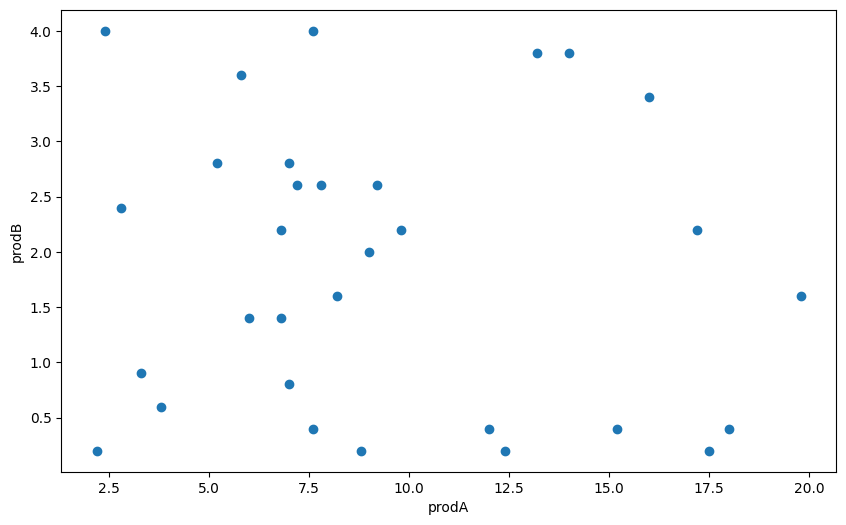

In [741]:
plt.figure(figsize=(10, 6))
plt.scatter(sprzedaz_marzec['prodA'], sprzedaz_marzec['prodB'])
plt.xlabel('prodA')
plt.ylabel('prodB')
plt.show()

In [742]:
sprzedaz = dane_posortowane[['dzien', 'Miesiac', 'prodA', 'prodB']].copy()
sumaprod = sprzedaz.groupby(['Miesiac'])[['prodA', 'prodB']].sum()
display(sumaprod)


C:\Users\cwiek\AppData\Local\Temp\ipykernel_20272\2102583255.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sumaprod = sprzedaz.groupby(['Miesiac'])[['prodA', 'prodB']].sum()


,prodA,prodB
Miesiac,,
styczen,62.7,14.2
luty,177.6,32.1
marzec,289.6,57.7


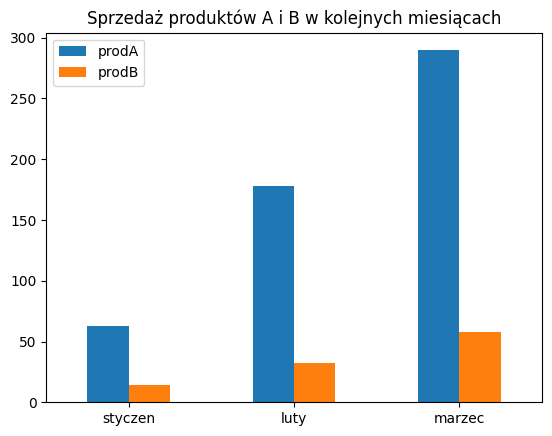

In [743]:
sumaprod.plot.bar()
plt.legend()
plt.title('Sprzedaż produktów A i B w kolejnych miesiącach')
plt.xlabel('')
plt.xticks(rotation=0)
plt.show()


In [744]:
punkty = sprzedaz.groupby('Miesiac')['prodB'].idxmax()

C:\Users\cwiek\AppData\Local\Temp\ipykernel_20272\3678388837.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  punkty = sprzedaz.groupby('Miesiac')['prodB'].idxmax()


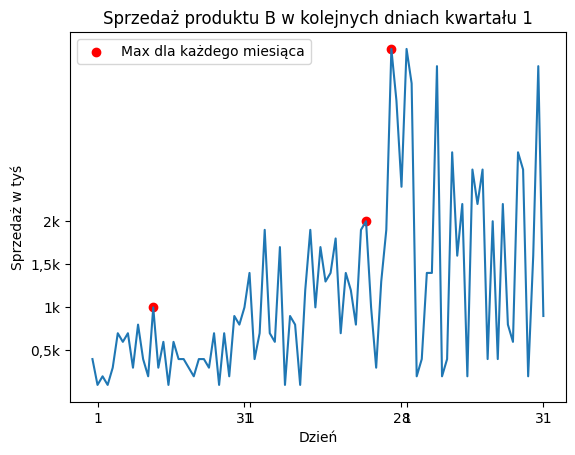

In [745]:
plt.plot(sprzedaz.index, sprzedaz['prodB'])
plt.scatter(punkty, sprzedaz.loc[punkty, 'prodB'], color='red', marker='o', label='Max dla każdego miesiąca')
plt.title('Sprzedaż produktu B w kolejnych dniach kwartału 1')
plt.xlabel('Dzień')
plt.ylabel('Sprzedaż w tyś')
yticksy = (0.5, 1, 1.5, 2)
yticksy_labels = ('0,5k', '1k', '1,5k', '2k')
xticks_positions = [1, 30, 31, 61, 62, 89] 
xticks_labels = ['1', '31', '1', '28', '1', '31']  
plt.xticks(xticks_positions, xticks_labels)
plt.yticks(yticksy, yticksy_labels)
plt.legend()
plt.show()